In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
% matplotlib inline
import scipy
from scipy.spatial.distance import pdist,cdist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score
from sklearn.preprocessing import OneHotEncoder 

In [0]:
df = pd.read_csv('Data2.csv')

In [3]:
df.shape

(346, 10)

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:

df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [0]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)

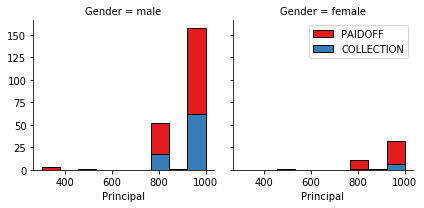

In [8]:
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

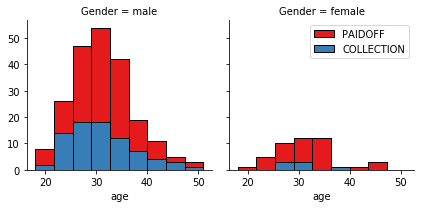

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

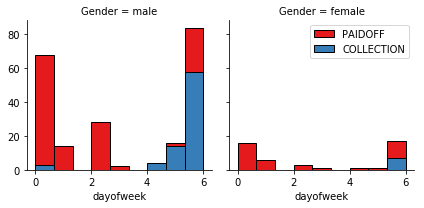

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

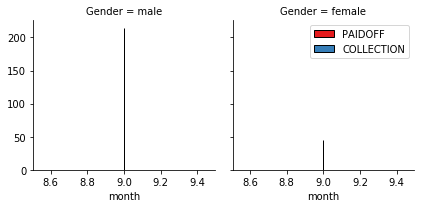

In [11]:
df['month'] = df['effective_date'].dt.month
bins = np.linspace(df.month.min(), df.month.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'month', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,month,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,9,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,9,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,9,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,9,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,9,1


In [0]:
one_hot = pd.get_dummies(df['Gender'])
df = df.drop('Gender',axis = 1)
# Join the encoded df
df = df.join(one_hot)


In [14]:
one_hot = pd.get_dummies(df['education'])
df = df.drop('education',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,dayofweek,month,weekend,female,male,Bechalor,High School or Below,Master or Above,college
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,3,9,0,0,1,0,1,0,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,3,9,0,1,0,1,0,0,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,3,9,0,0,1,0,0,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,4,9,1,1,0,0,0,0,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,4,9,1,0,1,0,0,0,1


In [15]:
X = df.drop(columns=['Unnamed: 0','Unnamed: 0.1','loan_status','effective_date','due_date'])
Y = df['loan_status']

X= StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.26122054,  0.        ,
        -1.20577805, -0.42056004,  0.42056004, -0.38170062,  1.13639374,
        -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, -0.26122054,  0.        ,
        -1.20577805,  2.37778177, -2.37778177,  2.61985426, -0.87997669,
        -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.26122054,  0.        ,
        -1.20577805, -0.42056004,  0.42056004, -0.38170062, -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  0.12175534,  0.        ,
         0.82934003,  2.37778177, -2.37778177, -0.38170062, -0.87997669,
        -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.12175534,  0.        ,
         0.82934003, -0.42056004,  0.42056004, -0.38170062, -0.87997669,
        -0.07624929,  1.14984679]])

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

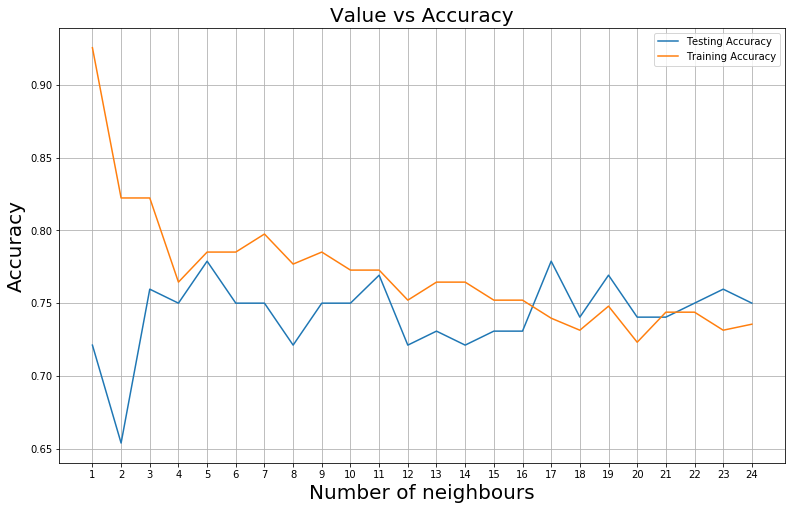

Best accuracy is 0.7788461538461539 with K=5


In [17]:
neig=np.arange(1,25)
train_accuracy=[]
test_accuracy=[]
ac_scores = []

#Loop over different values of k
for i,k in enumerate(neig):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train,y_train))
    test_accuracy.append(knn.score(x_test,y_test))
    y_pred = knn.predict(x_test)
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
    
    
MSE = [1 - x for x in ac_scores]
    
plt.figure(figsize=[13,8])
plt.plot(neig,test_accuracy,label="Testing Accuracy")
plt.plot(neig,train_accuracy,label="Training Accuracy")
plt.legend()
plt.title("Value vs Accuracy",fontsize=20)
plt.xlabel("Number of neighbours",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("Best accuracy is {} with K={}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [0]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [19]:
params = {
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

dt = DecisionTreeClassifier()

gs = GridSearchCV(estimator=dt,n_jobs=-1,cv=3,param_grid=params)
gs.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'm

In [20]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'auto',
 'max_leaf_nodes': 2,
 'splitter': 'random'}

In [0]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [22]:
accuracy_score(y_test,y_pred)

0.75

[Text(167.4, 163.07999999999998, 'X[7] <= -0.612\ngini = 0.381\nsamples = 242\nvalue = [62, 180]'),
 Text(83.7, 54.360000000000014, 'gini = 0.198\nsamples = 36\nvalue = [4, 32]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.405\nsamples = 206\nvalue = [58, 148]')]

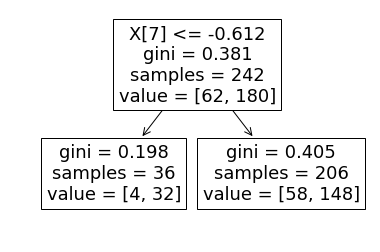

In [23]:
tree.plot_tree(dt.fit(x_train,y_train)) 

In [24]:
print('Classification report for KNN')
print(classification_report(y_test, y_pred_knn))

Classification report for KNN
              precision    recall  f1-score   support

  COLLECTION       0.53      0.42      0.47        24
     PAIDOFF       0.84      0.89      0.86        80

    accuracy                           0.78       104
   macro avg       0.68      0.65      0.66       104
weighted avg       0.76      0.78      0.77       104



In [25]:
print('Classification report for Decision tree')
print(classification_report(y_test, y_pred_dt))

Classification report for Decision tree
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        24
     PAIDOFF       0.77      1.00      0.87        80

    accuracy                           0.77       104
   macro avg       0.38      0.50      0.43       104
weighted avg       0.59      0.77      0.67       104



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
Algoritm=['KNN','Decision Tree']
f1_knn=f1_score(y_test,y_pred_knn,average=None)
f1_dtree=f1_score(y_test,y_pred_dt,average=None)
F1_score=[f1_knn,f1_dtree]

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
table = pd.DataFrame({
    "Algorithm": Algoritm,
    "F1-Score": F1_score})

In [28]:
table

,Algorithm,F1-Score
0,KNN,"[0.46511627906976744, 0.8606060606060607]"
1,Decision Tree,"[0.0, 0.8695652173913044]"
